# NetworkX - beagle Testing
------------------

- Test beagle implementation

### Import Libraries

In [1]:
import pandas as pd, numpy as np, networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.linear_model.logistic import LogisticRegression
pd.options.display.max_columns = 500
pd.options.display.max_colwidth = 500

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


### Load Network Data

In [2]:
df_zeek = pd.read_json("combined_zeek.log", lines = True)
df_zeek.replace('nan', np.nan, inplace=True)
print(type(df_zeek))
print(df_zeek.shape)
#print(df_zeek.EventID.value_counts())
df_zeek.head()

<class 'pandas.core.frame.DataFrame'>
(2140, 148)


,@stream,@system,@proc,ts,uid,id_orig_h,id_orig_p,id_resp_h,id_resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,orig_l2_addr,resp_l2_addr,rtt,named_pipe,endpoint,operation,trans_id,query,qclass,qclass_name,qtype,qtype_name,rcode,rcode_name,AA,TC,RD,RA,Z,answers,TTLs,rejected,analyzer,failure_reason,fuid,tx_hosts,rx_hosts,conn_uids,source,depth,analyzers,mime_type,filename,is_orig,seen_bytes,total_bytes,missing_bytes,overflow_bytes,timedout,md5,sha1,request_type,client,success,error_msg,till,forwardable,renewable,cipher,note,msg,sub,src,dst,p,actions,suppress_for,action,path,name,size,times_modified,times_accessed,times_created,times_changed,share_type,version,curve,server_name,resumed,established,cert_chain_fuids,client_cert_chain_fuids,subject,issuer,validation_status,resp_certificate_sha1,ja3,ja3s,notice,peer,addl,id,certificate_version,certificate_serial,certificate_subject,certificate_issuer,certificate_not_valid_before,certificate_not_valid_after,certificate_key_alg,certificate_sig_alg,certificate_key_type,certificate_key_length,certificate_exponent,basic_constraints_ca,extracted,extracted_cutoff,trans_depth,method,host,uri,user_agent,request_body_len,response_body_len,status_code,status_msg,tags,resp_fuids,resp_mime_types,client_header_names,orig_fuids,orig_mime_types,machine,compile_ts,os,subsystem,is_exe,is_64bit,uses_aslr,uses_dep,uses_code_integrity,uses_seh,has_import_table,has_export_table,has_cert_table,has_debug_data,section_names
0,conn,bobs.bigwheel.local,zeek,1.588205e+09,Cvf4XX17hSAgXDdGEd,10.0.1.6,54243.0,10.0.0.4,53.0,udp,dns,0.001528,39.0,55.0,SF,0.0,Dd,1.0,67.0,1.0,83.0,00:0d:3a:13:e3:69,12:34:56:78:9a:bc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,conn,bobs.bigwheel.local,zeek,1.588205e+09,CJ21Le4zsTUcyKKi98,10.0.1.6,56880.0,10.0.0.4,445.0,tcp,"gssapi,smb,krb",10.761077,4020.0,1681.0,RSTO,0.0,ShADdaR,12.0,1307.0,11.0,2133.0,00:0d:3a:13:e3:69,12:34:56:78:9a:bc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,conn,bobs.bigwheel.local,zeek,1.588205e+09,CnOP7t1eGGHf6LFfuk,10.0.1.6,65108.0,10.0.0.4,53.0,udp,dns,0.001599,36.0,104.0,SF,0.0,Dd,1.0,64.0,1.0,132.0,00:0d:3a:13:e3:69,12:34:56:78:9a:bc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,conn,bobs.bigwheel.local,zeek,1.588205e+09,CvxbPE3MuO7boUdSc8,10.0.1.6,138.0,10.0.1.255,138.0,udp,NaN,NaN,NaN,NaN,S0,0.0,D,1.0,229.0,0.0,0.0,00:0d:3a:13:e3:69,ff:ff:ff:ff:ff:ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Load Host Data

In [3]:
df_label = pd.read_json('./df_labelled_coalesce.json', lines=True)
df_label['TP_Binary'] = df_label.TP_Label!='0'
df_label.replace('-', np.nan, inplace=True)
print(type(df_label))
print(df_label.shape)
print(df_label.EventID.value_counts())
df_label.head(1)

<class 'pandas.core.frame.DataFrame'>
(198760, 390)
12       61158
10       39286
7        20259
13       17542
4658     10973
         ...  
172          1
46           1
50103        1
306          1
41           1
Name: EventID, Length: 165, dtype: int64


,@timestamp,@version,Category,Channel,EventID,EventReceivedTime,EventTime,EventType,ExecutionProcessID,Hostname,IpAddress,IpPort,Keywords,LogonGuid,Message,Opcode,OpcodeValue,ProviderGuid,RecordNumber,ServiceName,ServiceSid,Severity,SeverityValue,SourceModuleName,SourceModuleType,SourceName,Status,TargetDomainName,TargetUserName,Task,ThreadID,TicketEncryptionType,TicketOptions,TransmittedServices,Version,host,port,tags,TP_Label,Action,ActivityID,CalloutKey,CalloutName,ChangeType,Conditions,FilterId,FilterKey,FilterName,FilterType,LayerId,LayerKey,LayerName,ProcessId,ProviderKey,ProviderName,UserName,UserSid,Weight,AccessList,AccessMask,AccessReason,HandleId,ObjectName,ObjectServer,ObjectType,PrivilegeList,ProcessName,ResourceAttributes,RestrictedSidCount,SubjectDomainName,SubjectLogonId,SubjectUserName,SubjectUserSid,TransactionId,ShareLocalPath,ShareName,RelativeTargetName,CommandLine,MandatoryLabel,NewProcessId,NewProcessName,ParentProcessName,TargetLogonId,TargetUserSid,TokenElevationType,Service,DisabledPrivilegeList,EnabledPrivilegeList,CallerProcessId,CallerProcessName,TargetSid,AuthenticationPackageName,ElevatedToken,ImpersonationLevel,KeyLength,LmPackageName,LogonProcessName,LogonType,RestrictedAdminMode,TargetLinkedLogonId,TargetOutboundDomainName,TargetOutboundUserName,VirtualAccount,WorkstationName,SourceHandleId,SourceProcessId,TargetHandleId,TargetProcessId,AccountName,AccountType,ContextInfo,Domain,Payload,UserID,NewThreadId,RuleName,SourceImage,SourceProcessGuid,StartAddress,StartFunction,StartModule,TargetImage,TargetProcessGuid,UtcTime,MessageNumber,MessageTotal,Path,ScriptBlockId,ScriptBlockText,AlgorithmName,KeyName,KeyType,Operation,ReturnCode,Archived,Hashes,Image,IsExecutable,ProcessGuid,TargetFilename,User,CreationUtcTime,Company,Description,FileVersion,ImageLoaded,OriginalFileName,Product,Signature,SignatureStatus,Signed,DestinationHostname,DestinationIp,DestinationIsIpv6,DestinationPort,DestinationPortName,Initiated,Protocol,SourceHostname,SourceIp,SourceIsIpv6,SourcePort,SourcePortName,NewSd,OldSd,PipeName,CurrentDirectory,IntegrityLevel,LogonId,ParentCommandLine,ParentImage,ParentProcessGuid,ParentProcessId,TerminalSessionId,CallTrace,GrantedAccess,SourceProcessGUID,SourceThreadId,TargetProcessGUID,Device,TargetObject,Details,Application,FilterRTID,LayerRTID,SourceAddress,DestAddress,DestPort,Direction,RemoteMachineID,RemoteUserID,BootMenuPolicy,NewValue,NewValueType,ObjectValueName,OldValue,OldValueType,OperationType,ProfileUsed,RuleId,QueryName,QueryResults,QueryStatus,PreviousCreationUtcTime,EventCountTotal,EventIdx,GroupMembership,param1,Properties,Hash,PreAuthType,ClientProcessId,CountOfCredentialsReturned,ProcessCreationTime,ReadOperation,TargetName,Type,CalloutId,CalloutType,CorruptionActionState,DeviceName,DriveName,Config,IsTestConfig,DirtyPages,HiveName,HiveNameLength,KeysUpdated,PackageName,Workstation,DeviceNameLength,DeviceTime,DeviceVersionMajor,DeviceVersionMinor,FinalStatus,UserData,ServiceAccount,ServiceFileName,ServiceStartType,ServiceType,param10,param11,param2,param3,param4,param5,param6,param7,param8,param9,SubLayerKey,SubLayerName,SubLayerType,Default SD String:,ClassId,ClassName,CompatibleIds,DeviceDescription,DeviceId,LocationInformation,VendorIds,TargetProcessName,SecurityPackageName,AdditionalInfo,AdditionalInfo2,ProviderType,RuleAttr,AdapterName,AdapterSuffixName,DnsServerList,ErrorCode,Ipaddress,Sent UpdateServer,TaskContentNew,TaskName,ActiveProfile,MiniportName,MiniportNameLen,GroupPolicyApplied,LogDroppedPacketsEnabled,LogSuccessfulConnectionsEnabled,MulticastFlowsEnabled,OperationMode,Profile,RemoteAdminEnabled,TargetInfo,TargetLogonGuid,TargetServerName,ClientCreationTime,TimeSource,ImagePath,StartType,ProfileChanged,BootType,LoadOptions,EntryCount,KeyFilePath,ProviderContextKey,ProviderContextName,ProviderContextType,DwordVal,InterfaceGuid,InterfaceName,NewProfile,OldProfile,InstanceId,MaxRunspaces,MinRunspaces,CurrentStratumNumber,TimeSourceRefId,ReasonForRejection,

## Host<->Network Append
------------------

In [4]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
#    In [9]: result = pd.concat([df1, df4], axis=1, sort=False)
df_label = df_label.append(df_zeek, ignore_index=True, sort=False)

In [5]:
df_label.shape

(200900, 536)

In [6]:
df_label.head(1)

,@timestamp,@version,Category,Channel,EventID,EventReceivedTime,EventTime,EventType,ExecutionProcessID,Hostname,IpAddress,IpPort,Keywords,LogonGuid,Message,Opcode,OpcodeValue,ProviderGuid,RecordNumber,ServiceName,ServiceSid,Severity,SeverityValue,SourceModuleName,SourceModuleType,SourceName,Status,TargetDomainName,TargetUserName,Task,ThreadID,TicketEncryptionType,TicketOptions,TransmittedServices,Version,host,port,tags,TP_Label,Action,ActivityID,CalloutKey,CalloutName,ChangeType,Conditions,FilterId,FilterKey,FilterName,FilterType,LayerId,LayerKey,LayerName,ProcessId,ProviderKey,ProviderName,UserName,UserSid,Weight,AccessList,AccessMask,AccessReason,HandleId,ObjectName,ObjectServer,ObjectType,PrivilegeList,ProcessName,ResourceAttributes,RestrictedSidCount,SubjectDomainName,SubjectLogonId,SubjectUserName,SubjectUserSid,TransactionId,ShareLocalPath,ShareName,RelativeTargetName,CommandLine,MandatoryLabel,NewProcessId,NewProcessName,ParentProcessName,TargetLogonId,TargetUserSid,TokenElevationType,Service,DisabledPrivilegeList,EnabledPrivilegeList,CallerProcessId,CallerProcessName,TargetSid,AuthenticationPackageName,ElevatedToken,ImpersonationLevel,KeyLength,LmPackageName,LogonProcessName,LogonType,RestrictedAdminMode,TargetLinkedLogonId,TargetOutboundDomainName,TargetOutboundUserName,VirtualAccount,WorkstationName,SourceHandleId,SourceProcessId,TargetHandleId,TargetProcessId,AccountName,AccountType,ContextInfo,Domain,Payload,UserID,NewThreadId,RuleName,SourceImage,SourceProcessGuid,StartAddress,StartFunction,StartModule,TargetImage,TargetProcessGuid,UtcTime,MessageNumber,MessageTotal,Path,ScriptBlockId,ScriptBlockText,AlgorithmName,KeyName,KeyType,Operation,ReturnCode,Archived,Hashes,Image,IsExecutable,ProcessGuid,TargetFilename,User,CreationUtcTime,Company,Description,FileVersion,ImageLoaded,OriginalFileName,Product,Signature,SignatureStatus,Signed,DestinationHostname,DestinationIp,DestinationIsIpv6,DestinationPort,DestinationPortName,Initiated,Protocol,SourceHostname,SourceIp,SourceIsIpv6,SourcePort,SourcePortName,NewSd,OldSd,PipeName,CurrentDirectory,IntegrityLevel,LogonId,ParentCommandLine,ParentImage,ParentProcessGuid,ParentProcessId,TerminalSessionId,CallTrace,GrantedAccess,SourceProcessGUID,SourceThreadId,TargetProcessGUID,Device,TargetObject,Details,Application,FilterRTID,LayerRTID,SourceAddress,DestAddress,DestPort,Direction,RemoteMachineID,RemoteUserID,BootMenuPolicy,NewValue,NewValueType,ObjectValueName,OldValue,OldValueType,OperationType,ProfileUsed,RuleId,QueryName,QueryResults,QueryStatus,PreviousCreationUtcTime,EventCountTotal,EventIdx,GroupMembership,param1,Properties,Hash,PreAuthType,ClientProcessId,CountOfCredentialsReturned,ProcessCreationTime,ReadOperation,TargetName,Type,CalloutId,CalloutType,CorruptionActionState,DeviceName,DriveName,Config,IsTestConfig,DirtyPages,HiveName,HiveNameLength,KeysUpdated,PackageName,Workstation,DeviceNameLength,DeviceTime,DeviceVersionMajor,DeviceVersionMinor,FinalStatus,UserData,ServiceAccount,ServiceFileName,ServiceStartType,ServiceType,param10,param11,param2,param3,param4,param5,param6,param7,param8,param9,...,TargetLogonGuid,TargetServerName,ClientCreationTime,TimeSource,ImagePath,StartType,ProfileChanged,BootType,LoadOptions,EntryCount,KeyFilePath,ProviderContextKey,ProviderContextName,ProviderContextType,DwordVal,InterfaceGuid,InterfaceName,NewProfile,OldProfile,InstanceId,MaxRunspaces,MinRunspaces,CurrentStratumNumber,TimeSourceRefId,ReasonForRejection,Active,EdgeTraversal,EmbeddedContext,Flags,LocalAddresses,LocalOnlyMapped,LooseSourceMapped,ModifyingApplication,ModifyingUser,Origin,Profiles,RemoteAddresses,RuleStatus,SchemaVersion,SecurityOptions,CountNew,CountOld,EnabledNew,UpdateReason,NewTime,PreviousTime,NotificationPackageName,ShutdownActionType,ShutdownEventCode,ShutdownReason,BootMode,BuildVersion,MajorVersion,MinorVersion,QfeVersion,ServiceVersion,StartTime,EnableDisableReason,VsmPolicy,DCName,ProcessingMode,ProcessingTimeInMilliseconds,SupportInfo1,SupportInfo2,Gr

In [7]:
df_label.tail(1)

,@timestamp,@version,Category,Channel,EventID,EventReceivedTime,EventTime,EventType,ExecutionProcessID,Hostname,IpAddress,IpPort,Keywords,LogonGuid,Message,Opcode,OpcodeValue,ProviderGuid,RecordNumber,ServiceName,ServiceSid,Severity,SeverityValue,SourceModuleName,SourceModuleType,SourceName,Status,TargetDomainName,TargetUserName,Task,ThreadID,TicketEncryptionType,TicketOptions,TransmittedServices,Version,host,port,tags,TP_Label,Action,ActivityID,CalloutKey,CalloutName,ChangeType,Conditions,FilterId,FilterKey,FilterName,FilterType,LayerId,LayerKey,LayerName,ProcessId,ProviderKey,ProviderName,UserName,UserSid,Weight,AccessList,AccessMask,AccessReason,HandleId,ObjectName,ObjectServer,ObjectType,PrivilegeList,ProcessName,ResourceAttributes,RestrictedSidCount,SubjectDomainName,SubjectLogonId,SubjectUserName,SubjectUserSid,TransactionId,ShareLocalPath,ShareName,RelativeTargetName,CommandLine,MandatoryLabel,NewProcessId,NewProcessName,ParentProcessName,TargetLogonId,TargetUserSid,TokenElevationType,Service,DisabledPrivilegeList,EnabledPrivilegeList,CallerProcessId,CallerProcessName,TargetSid,AuthenticationPackageName,ElevatedToken,ImpersonationLevel,KeyLength,LmPackageName,LogonProcessName,LogonType,RestrictedAdminMode,TargetLinkedLogonId,TargetOutboundDomainName,TargetOutboundUserName,VirtualAccount,WorkstationName,SourceHandleId,SourceProcessId,TargetHandleId,TargetProcessId,AccountName,AccountType,ContextInfo,Domain,Payload,UserID,NewThreadId,RuleName,SourceImage,SourceProcessGuid,StartAddress,StartFunction,StartModule,TargetImage,TargetProcessGuid,UtcTime,MessageNumber,MessageTotal,Path,ScriptBlockId,ScriptBlockText,AlgorithmName,KeyName,KeyType,Operation,ReturnCode,Archived,Hashes,Image,IsExecutable,ProcessGuid,TargetFilename,User,CreationUtcTime,Company,Description,FileVersion,ImageLoaded,OriginalFileName,Product,Signature,SignatureStatus,Signed,DestinationHostname,DestinationIp,DestinationIsIpv6,DestinationPort,DestinationPortName,Initiated,Protocol,SourceHostname,SourceIp,SourceIsIpv6,SourcePort,SourcePortName,NewSd,OldSd,PipeName,CurrentDirectory,IntegrityLevel,LogonId,ParentCommandLine,ParentImage,ParentProcessGuid,ParentProcessId,TerminalSessionId,CallTrace,GrantedAccess,SourceProcessGUID,SourceThreadId,TargetProcessGUID,Device,TargetObject,Details,Application,FilterRTID,LayerRTID,SourceAddress,DestAddress,DestPort,Direction,RemoteMachineID,RemoteUserID,BootMenuPolicy,NewValue,NewValueType,ObjectValueName,OldValue,OldValueType,OperationType,ProfileUsed,RuleId,QueryName,QueryResults,QueryStatus,PreviousCreationUtcTime,EventCountTotal,EventIdx,GroupMembership,param1,Properties,Hash,PreAuthType,ClientProcessId,CountOfCredentialsReturned,ProcessCreationTime,ReadOperation,TargetName,Type,CalloutId,CalloutType,CorruptionActionState,DeviceName,DriveName,Config,IsTestConfig,DirtyPages,HiveName,HiveNameLength,KeysUpdated,PackageName,Workstation,DeviceNameLength,DeviceTime,DeviceVersionMajor,DeviceVersionMinor,FinalStatus,UserData,ServiceAccount,ServiceFileName,ServiceStartType,ServiceType,param10,param11,param2,param3,param4,param5,param6,param7,param8,param9,...,TargetLogonGuid,TargetServerName,ClientCreationTime,TimeSource,ImagePath,StartType,ProfileChanged,BootType,LoadOptions,EntryCount,KeyFilePath,ProviderContextKey,ProviderContextName,ProviderContextType,DwordVal,InterfaceGuid,InterfaceName,NewProfile,OldProfile,InstanceId,MaxRunspaces,MinRunspaces,CurrentStratumNumber,TimeSourceRefId,ReasonForRejection,Active,EdgeTraversal,EmbeddedContext,Flags,LocalAddresses,LocalOnlyMapped,LooseSourceMapped,ModifyingApplication,ModifyingUser,Origin,Profiles,RemoteAddresses,RuleStatus,SchemaVersion,SecurityOptions,CountNew,CountOld,EnabledNew,UpdateReason,NewTime,PreviousTime,NotificationPackageName,ShutdownActionType,ShutdownEventCode,ShutdownReason,BootMode,BuildVersion,MajorVersion,MinorVersion,QfeVersion,ServiceVersion,StartTime,EnableDisableReason,VsmPolicy,DCName,ProcessingMode,ProcessingTimeInMilliseconds,SupportInfo1,SupportInfo2,Gr

# Normalize Timestamp, IP/Port Columns
------------------

## Common Timestamp Column

In [8]:
df_label['time_stamp'] = df_label['@timestamp'].apply(lambda x: (pd.Timestamp(x)))

In [9]:
df_label['time_stamp'] = df_label['time_stamp'].fillna(df_label['ts'].apply(lambda x: (pd.to_datetime(x, unit='s', utc=True))))

## Common IP/Port Columns

In [10]:
# Transform Host Data - Similar Data to Single Columns
df_label['Destination_IP'] = df_label['DestinationIp']
df_label['Destination_IP'] = df_label['Destination_IP'].fillna(df_label['DestAddress'])
df_label['Source_IP'] = df_label['IpAddress']
df_label['Source_IP'] = df_label['Source_IP'].fillna(df_label['SourceIp'])
df_label['Source_IP'] = df_label['Source_IP'].fillna(df_label['SourceAddress'])
df_label['Source_Port'] = df_label['IpPort']
df_label['Source_Port'] = df_label['Source_Port'].fillna(df_label['SourcePort'])
df_label['Destination_Port'] = df_label['DestinationPort']
df_label['Destination_Port'] = df_label['Destination_Port'].fillna(df_label['DestPort'])

In [11]:
# Transform Network Data - Similar Data to Single Columns
df_label['Source_IP'] = df_label['Source_IP'].fillna(df_label['id_orig_h'])
df_label['Source_Port'] = df_label['Source_Port'].fillna(df_label['id_orig_p'])
df_label['Destination_IP'] = df_label['Destination_IP'].fillna(df_label['id_resp_h'])
df_label['Destination_Port'] = df_label['Destination_Port'].fillna(df_label['id_resp_p'])

## Common Hostname/uid Column -> no longer necessary?

In [12]:
#df_label['Hostname_uid'] = df_label['Hostname']

In [13]:
#df_label['Hostname_uid'] = df_label['Hostname_uid'].fillna(df_label['uid'])

## Beagle Column Formatting

In [14]:
df_label['EventData_ParentImage'] = df_label['ParentImage'].astype(object)
df_label['EventData_ParentProcessId'] = df_label['ParentProcessId']
df_label['EventData_ParentProcessGuid'] = df_label['ParentProcessGuid']
df_label['EventData_Image'] = df_label['Image'].astype(object)
df_label['EventData_CommandLine'] = df_label['CommandLine'].astype(object)
df_label['EventData_Hashes'] = df_label['Hashes'].astype(object)

df_label['Computer'] = df_label['Hostname'].astype(object)
df_label['EventData_User'] = df_label['User'].astype(object)
df_label['EventData_UtcTime'] = df_label['UtcTime']

df_label['EventData_ProcessGuid'] = df_label['ProcessGuid']
df_label['EventData_ProcessId'] = df_label['ProcessId']

df_label['EventData_DestinationIp'] = df_label['DestinationIp']
df_label['EventData_DestinationPort'] = df_label['DestinationPort']
df_label['EventData_Protocol'] = df_label['Protocol']
df_label['EventData_TargetFilename'] = df_label['TargetFilename']

df_label['EventData_TargetObject'] = df_label['TargetObject']
df_label['EventData_EventType'] = df_label['EventType']
#df_label['EventData_Details'] = df_label['ProcessId']

# Testing Beagle

In [15]:
from beagle.backends import NetworkX
from beagle.transformers import SysmonTransformer

In [16]:
import os
import json
from typing import Dict, Generator, List

from beagle.datasources.base_datasource import DataSource
from beagle.transformers import GenericTransformer
from beagle.transformers.sysmon_transformer import SysmonTransformer

class JSONData(DataSource):
    """A generic data source which returns events one by one
    """

    name = "JSON Data"
    transformers = [SysmonTransformer]
    category = "Generic Data"

    def __init__(self, events: List[Dict]) -> None:
        self._events = events

    def events(self) -> Generator[dict, None, None]:
        for event in self._events:
            yield event

    def metadata(self) -> dict:
        return {}

In [17]:
from beagle.backends import NetworkX

NX = NetworkX.from_datasources(
    datasources=[
        JSONData(df_label.loc[(df_label['EventID']==1)].to_dict('records')),
        JSONData(df_label.loc[(df_label['EventID']==3)].to_dict('records')),
        JSONData(df_label.loc[(df_label['EventID']==11)].to_dict('records')),
    ]
)
G = NX.graph()

2020-07-02T21:23:41 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.
2020-07-02T21:23:41 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-02T21:23:41 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-02T21:23:41 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-02T21:23:41 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-02T21:23:41 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 1784 nodes.
2020-07-02T21:23:41 | beagle.transformers.base_transfor

### Checking beagle NetworkX object vs JSON NetworkX

In [18]:
G

In [19]:
graph_json = NetworkX.graph_to_json(G)

2020-07-02T21:23:42 | beagle.backends.networkx.__init__:56 | INFO | Initialized NetworkX Backend


In [20]:
from networkx.readwrite import json_graph

G = json_graph.node_link_graph(graph_json)

In [21]:
# Better. Now has all the data encoded in networkx format.
list(G.nodes(data=True))

[(4382267649556480259,
  {'properties': {'process_guid': '{47ab858c-cadc-5eac-2200-000000000400}',
    'host': 'SCRANTON.dmevals.local',
    'process_id': 1448,
    'user': None,
    'process_image': 'svchost.exe',
    'process_image_path': 'C:\\Windows\\System32',
    'command_line': None,
    'hashes': {},
    'process_path': 'C:\\Windows\\System32\\svchost.exe'},
   '_node_type': 'Process',
   '_node_class': 'SysMonProc',
   '_display': 'svchost.exe',
   '_color': '#FF0000'}),
 (7068519372742780078,
  {'properties': {'process_guid': '{47ab858c-e589-5eac-f803-000000000400}',
    'host': 'SCRANTON.dmevals.local',
    'process_id': 8288,
    'user': 'DMEVALS\\pbeesly',
    'process_image': 'taskhostw.exe',
    'process_image_path': 'C:\\Windows\\System32',
    'command_line': 'taskhostw.exe Install $(Arg0)',
    'hashes': {'sha1': '9245F36AA783167E0AFE948B1C0E8E7F3B81E3D4',
     'md5': '8AC325C757FA721B272ECEA19EBCF745',
     'sha256': '0BEC3128B241FA533DC5A9D3F62AA41323D205DEFC30DCDE2

In [40]:
# So the ancestor descendent method his highly specific if the origin process is further down the causal chain. 
# Ideally, I want the seniormost ancestor process from the origin.

# Manual Recurse Ancestor Chain for Root Malicious Process Node.

## eval_ancestor_chain

In [191]:
def eval_ancestor_chain(G, starting_guid):
    for (p, d) in G.nodes(data=True):
        if 'process_guid' in d['properties'].keys():
            if starting_guid in d['properties']['process_guid']:
                selected_node = p
                
    #ancestors = nx.ancestors(G, selected_node)
    malicious_ancestors = [selected_node]
    for i in nx.ancestors(G, selected_node):
        if(G.node[i]['_node_type'] == 'Process'):
            print("==========================================")
            print("Node Data:")
            print("==========================================")
            print(G.node[i])
            print("==========================================")
            answer = None
            while answer not in ("yes", "no"):
                answer = input("Malicious? Enter yes or no: ")
                if answer == "yes":
                    # Do this.
                    malicious_ancestors.append(i)
                elif answer == "no":
                    # Do that.
                    return malicious_ancestors
                else:
                    print("Please enter yes or no.")
    return malicious_ancestors

In [192]:
malicious_ancestors = eval_ancestor_chain(G, '{5aa8ec29-e618-5eac-7e03-000000000400}')

Node Data:
{'properties': {'process_guid': '{5aa8ec29-e5b8-5eac-7903-000000000400}', 'host': 'NASHUA.dmevals.local', 'process_id': 2172, 'user': nan, 'process_image': 'python.exe', 'process_image_path': 'C:\\Windows\\Temp', 'command_line': '"C:\\Windows\\Temp\\python.exe" ', 'hashes': {'sha1': '585EB59D12A111E9291518C5CF5D3FD296C2B581', 'md5': '57292CE8714E2D221D9D97C9D061D332', 'sha256': '43782EC4337D8F3DDB7EA0C451B3BC4F212F84C8D5571BD0A842001C859A02AE', 'imphash': '00000000000000000000000000000000'}, 'process_path': 'C:\\Windows\\Temp\\python.exe'}, '_node_type': 'Process', '_node_class': 'SysMonProc', '_display': 'python.exe', '_color': '#FF0000'}


Malicious? Enter yes or no:  yes


Node Data:
{'properties': {'process_guid': '{5aa8ec29-e5b7-5eac-7603-000000000400}', 'host': 'NASHUA.dmevals.local', 'process_id': 1624, 'user': 'NT AUTHORITY\\SYSTEM', 'process_image': 'PSEXESVC.exe', 'process_image_path': 'C:\\Windows', 'command_line': 'C:\\windows\\PSEXESVC.exe', 'hashes': {'sha1': 'F1E36E0E34276A5015040780E14B58EFD1112B76', 'md5': 'AE5BB9F3FFF1AEAAAD619BAB105B2391', 'sha256': '224F549F33854ED53667055786DC1073E64B7428FAE26F27DAB9828ED502BB99', 'imphash': '09D5553D2AA2F39BDE811B88883DE7D5'}, 'process_path': 'C:\\Windows\\PSEXESVC.exe'}, '_node_type': 'Process', '_node_class': 'SysMonProc', '_display': 'PSEXESVC.exe', '_color': '#FF0000'}


Malicious? Enter yes or no:  yes


Node Data:
{'properties': {'process_guid': '{5aa8ec29-e5b7-5eac-7703-000000000400}', 'host': 'NASHUA.dmevals.local', 'process_id': 2952, 'user': nan, 'process_image': 'python.exe', 'process_image_path': 'C:\\Windows\\Temp', 'command_line': '"C:\\Windows\\Temp\\python.exe" ', 'hashes': {'sha1': '585EB59D12A111E9291518C5CF5D3FD296C2B581', 'md5': '57292CE8714E2D221D9D97C9D061D332', 'sha256': '43782EC4337D8F3DDB7EA0C451B3BC4F212F84C8D5571BD0A842001C859A02AE', 'imphash': '00000000000000000000000000000000'}, 'process_path': 'C:\\Windows\\Temp\\python.exe'}, '_node_type': 'Process', '_node_class': 'SysMonProc', '_display': 'python.exe', '_color': '#FF0000'}


Malicious? Enter yes or no:  yes


Node Data:
{'properties': {'process_guid': '{5aa8ec29-cad7-5eac-0b00-000000000400}', 'host': 'NASHUA.dmevals.local', 'process_id': 720, 'user': None, 'process_image': 'services.exe', 'process_image_path': 'C:\\Windows\\System32', 'command_line': None, 'hashes': {}, 'process_path': 'C:\\Windows\\System32\\services.exe'}, '_node_type': 'Process', '_node_class': 'SysMonProc', '_display': 'services.exe', '_color': '#FF0000'}


Malicious? Enter yes or no:  no


## determine_malicious_root_proc

In [177]:
def determine_malicious_root_proc(G, starting_guid):
    malicious_ancestors = eval_ancestor_chain(G, starting_guid)
    print("")
    print("##########################################")
    print("Confirm this as the senior malicious node?")
    print("##########################################")
    print("Node Data:")
    print("==========================================")
    print(G.node[malicious_ancestors[-1]])
    print("==========================================")
    print("Edge Out Data:")
    print("==========================================")
    for i in G.out_edges(malicious_ancestors[-1], data=True):
        if i[2]['type'] == 'Launched':
            print(i[2]['type'])
            print(G.node[i[1]])
            print("==========================================")
    answer = None
    while answer not in ("yes", "no"):
        answer = input("Malicious? Enter yes or no: ")
        if answer == "yes":
            # Do this.
            return malicious_ancestors[-1]
        elif answer == "no":
            # Do that.
            print("Re-run the eval_ancestor chain")
            malicious_root_ancestor = determine_malicious_root_proc(G, starting_guid)
            return malicious_root_ancestor
        else:
            print("Please enter yes or no.")

In [178]:
malicious_root_ancestor = determine_malicious_root_proc(G, '{5aa8ec29-e618-5eac-7e03-000000000400}')
print(malicious_root_ancestor)

Node Data:
{'properties': {'process_guid': '{5aa8ec29-e5b8-5eac-7903-000000000400}', 'host': 'NASHUA.dmevals.local', 'process_id': 2172, 'user': nan, 'process_image': 'python.exe', 'process_image_path': 'C:\\Windows\\Temp', 'command_line': '"C:\\Windows\\Temp\\python.exe" ', 'hashes': {'sha1': '585EB59D12A111E9291518C5CF5D3FD296C2B581', 'md5': '57292CE8714E2D221D9D97C9D061D332', 'sha256': '43782EC4337D8F3DDB7EA0C451B3BC4F212F84C8D5571BD0A842001C859A02AE', 'imphash': '00000000000000000000000000000000'}, 'process_path': 'C:\\Windows\\Temp\\python.exe'}, '_node_type': 'Process', '_node_class': 'SysMonProc', '_display': 'python.exe', '_color': '#FF0000'}


Malicious? Enter yes or no:  yes


Node Data:
{'properties': {'process_guid': '{5aa8ec29-e5b7-5eac-7603-000000000400}', 'host': 'NASHUA.dmevals.local', 'process_id': 1624, 'user': 'NT AUTHORITY\\SYSTEM', 'process_image': 'PSEXESVC.exe', 'process_image_path': 'C:\\Windows', 'command_line': 'C:\\windows\\PSEXESVC.exe', 'hashes': {'sha1': 'F1E36E0E34276A5015040780E14B58EFD1112B76', 'md5': 'AE5BB9F3FFF1AEAAAD619BAB105B2391', 'sha256': '224F549F33854ED53667055786DC1073E64B7428FAE26F27DAB9828ED502BB99', 'imphash': '09D5553D2AA2F39BDE811B88883DE7D5'}, 'process_path': 'C:\\Windows\\PSEXESVC.exe'}, '_node_type': 'Process', '_node_class': 'SysMonProc', '_display': 'PSEXESVC.exe', '_color': '#FF0000'}


Malicious? Enter yes or no:  yes


Node Data:
{'properties': {'process_guid': '{5aa8ec29-e5b7-5eac-7703-000000000400}', 'host': 'NASHUA.dmevals.local', 'process_id': 2952, 'user': nan, 'process_image': 'python.exe', 'process_image_path': 'C:\\Windows\\Temp', 'command_line': '"C:\\Windows\\Temp\\python.exe" ', 'hashes': {'sha1': '585EB59D12A111E9291518C5CF5D3FD296C2B581', 'md5': '57292CE8714E2D221D9D97C9D061D332', 'sha256': '43782EC4337D8F3DDB7EA0C451B3BC4F212F84C8D5571BD0A842001C859A02AE', 'imphash': '00000000000000000000000000000000'}, 'process_path': 'C:\\Windows\\Temp\\python.exe'}, '_node_type': 'Process', '_node_class': 'SysMonProc', '_display': 'python.exe', '_color': '#FF0000'}


Malicious? Enter yes or no:  yes


Node Data:
{'properties': {'process_guid': '{5aa8ec29-cad7-5eac-0b00-000000000400}', 'host': 'NASHUA.dmevals.local', 'process_id': 720, 'user': None, 'process_image': 'services.exe', 'process_image_path': 'C:\\Windows\\System32', 'command_line': None, 'hashes': {}, 'process_path': 'C:\\Windows\\System32\\services.exe'}, '_node_type': 'Process', '_node_class': 'SysMonProc', '_display': 'services.exe', '_color': '#FF0000'}


Malicious? Enter yes or no:  no



##########################################
Confirm this as the senior malicious node?
##########################################
Node Data:
{'properties': {'process_guid': '{5aa8ec29-e5b7-5eac-7703-000000000400}', 'host': 'NASHUA.dmevals.local', 'process_id': 2952, 'user': nan, 'process_image': 'python.exe', 'process_image_path': 'C:\\Windows\\Temp', 'command_line': '"C:\\Windows\\Temp\\python.exe" ', 'hashes': {'sha1': '585EB59D12A111E9291518C5CF5D3FD296C2B581', 'md5': '57292CE8714E2D221D9D97C9D061D332', 'sha256': '43782EC4337D8F3DDB7EA0C451B3BC4F212F84C8D5571BD0A842001C859A02AE', 'imphash': '00000000000000000000000000000000'}, 'process_path': 'C:\\Windows\\Temp\\python.exe'}, '_node_type': 'Process', '_node_class': 'SysMonProc', '_display': 'python.exe', '_color': '#FF0000'}
Edge Out Data:
Launched
{'properties': {'process_guid': '{5aa8ec29-e5b8-5eac-7903-000000000400}', 'host': 'NASHUA.dmevals.local', 'process_id': 2172, 'user': nan, 'process_image': 'python.exe', 'process_image_pa

Malicious? Enter yes or no:  yes


8907468836259402806


## get_ancestor_descendant_graph

In [179]:
def get_ancestor_descendant_graph(G, malicious_root_ancestor):
    print(malicious_root_ancestor)

    descendants = nx.descendants(G, malicious_root_ancestor) #Returns all nodes reachable from source in G.
    print(len(descendants))

    ancestors = nx.ancestors(G, malicious_root_ancestor)
    print(len(ancestors))

    suspected_malicious = list(ancestors) + list(descendants)
    suspected_malicious.append(malicious_root_ancestor)
    print(len(suspected_malicious))

    H = G.subgraph(suspected_malicious)
    return H, malicious_root_ancestor, ancestors, descendants

In [180]:
H, malicious_root_ancestor, ancestors, descendants = get_ancestor_descendant_graph(G, malicious_root_ancestor)

8907468836259402806
38
5
44


## print_ancestor_descendant_graph

In [198]:
def print_ancestor_descendant_graph(H, malicious_root_ancestor, ancestors, descendants):
    from matplotlib.pyplot import figure
    # Why are there orphaned nodes? I forgot to add the OG node. Fixed.
    # https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
    #fig = plt.Figure()
    figure(figsize=(15, 12))
    pos=nx.kamada_kawai_layout(H) # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(H,pos,
                       nodelist=list(ancestors),
                       node_color='r',
                       #node_size=500,
                       label='ancestors',
                   alpha=0.8)
    nx.draw_networkx_nodes(H,pos,
                       nodelist=list(descendants),
                       node_color='b',
                       #node_size=500,
                       label='descendants',
                   alpha=0.8)
    nx.draw_networkx_nodes(H,pos,
                       nodelist=[malicious_root_ancestor],
                       node_color='g',
                       #node_size=500,
                       label='starting-point',
                   alpha=0.8)

    # edges
    nx.draw_networkx_edges(H,pos,width=1.0,alpha=0.5)

    #plt.legend()
    plt.legend(loc='upper left')
    #fig.update_layout(legend=dict(x=-.1, y=1.2))
    plt.axis('off')
    print("Saving as: ancestor_descendants_" + str(malicious_root_ancestor) + ".png")
    plt.savefig("ancestor_descendants_" + str(malicious_root_ancestor) + ".png") # save as png
    plt.show() # display

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


Saving as: ancestor_descendants_8907468836259402806.png


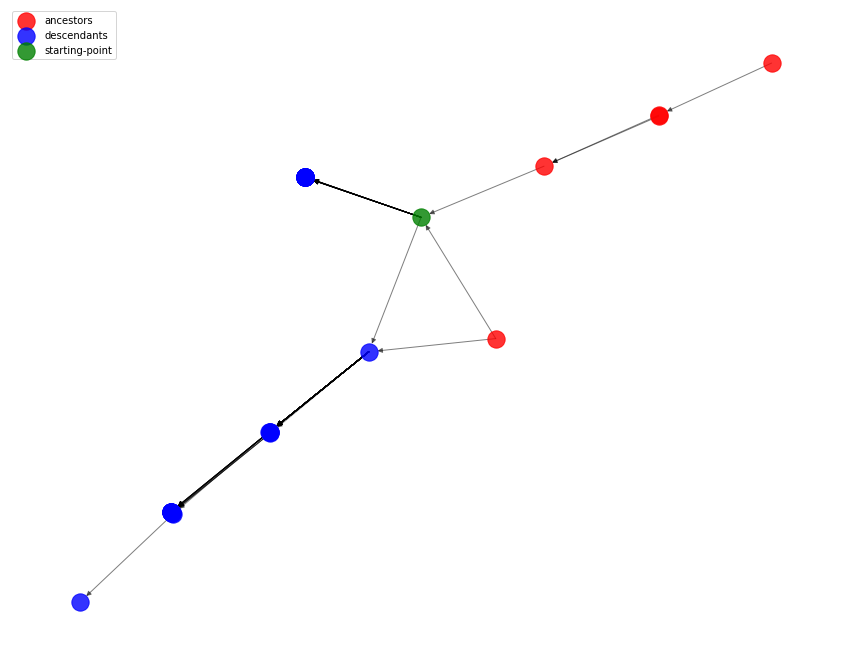

In [182]:
print_ancestor_descendant_graph(H, malicious_root_ancestor, ancestors, descendants)

## get_ancestor_descendant_types

In [183]:
def get_ancestor_descendant_types(H):
    file_nodes = []
    for (p, d) in H.nodes(data=True):
        if d['_node_type']=='File':
            file_nodes.append(p)
    len(file_nodes)

    proc_nodes = []
    for (p, d) in H.nodes(data=True):
        if d['_node_type']=='Process':
            proc_nodes.append(p)
    len(proc_nodes)

    ip_nodes = []
    for (p, d) in H.nodes(data=True):
        if d['_node_type']=='IP Address':
            ip_nodes.append(p)
    len(ip_nodes)
    
    return file_nodes, proc_nodes, ip_nodes

In [184]:
file_nodes, proc_nodes, ip_nodes = get_ancestor_descendant_types(H)

## print_ancestor_descendant_type_graph

In [196]:
def print_ancestor_descendant_type_graph(H, malicious_root_ancestor, file_nodes, proc_nodes, ip_nodes):
    # Why are there orphaned nodes? I forgot to add the OG node. Fixed.
    # https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
    #fig = plt.Figure()
    figure(figsize=(15, 12))
    pos=nx.kamada_kawai_layout(H) # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(H,pos,
                           nodelist=file_nodes,
                           node_color='r',
                           #node_size=500,
                           label='file_nodes',
                       alpha=0.8)
    nx.draw_networkx_nodes(H,pos,
                           nodelist=proc_nodes,
                           node_color='b',
                           #node_size=500,
                           label='proc_nodes',
                       alpha=0.8)
    nx.draw_networkx_nodes(H,pos,
                           nodelist=ip_nodes,
                           node_color='g',
                           #node_size=500,
                           label='ip_nodes',
                       alpha=0.8)

    # edges
    nx.draw_networkx_edges(H,pos,width=1.0,alpha=0.5)

    #plt.legend()
    plt.legend(loc='upper left')
    #fig.update_layout(legend=dict(x=-.1, y=1.2))
    plt.axis('off')
    print("Saving as: ancestor_descendants_nodeType_" + str(malicious_root_ancestor) + ".png")
    plt.savefig("ancestor_descendants_nodeType_" + str(malicious_root_ancestor) + ".png") # save as png
    plt.show() # display

Saving as: ancestor_descendants_nodeType_8907468836259402806.png


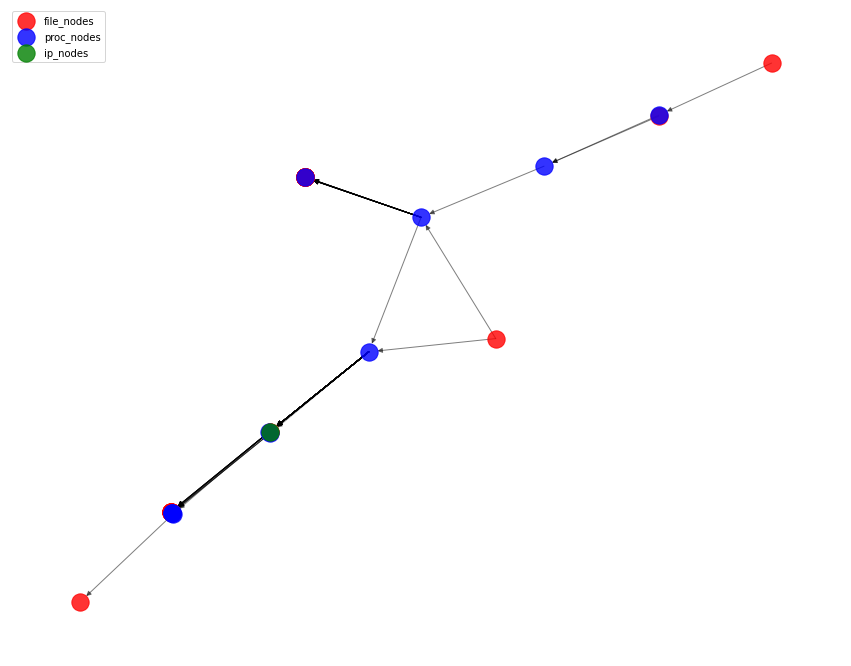

In [186]:
print_ancestor_descendant_type_graph(H, malicious_root_ancestor, file_nodes, proc_nodes, ip_nodes)

In [187]:
def analyze_graph_vs_label_proc(H, proc_nodes):
    graph_bad_guids = []
    for i in proc_nodes:
        graph_bad_guids.append(H.node[i]['properties']['process_guid'])
    print(len(graph_bad_guids))
    #print(graph_bad_guids)
    
    label_bad_guids = df_label.loc[(df_label['TP_Binary'] == True) & (df_label.ProcessGuid.notnull())]['ProcessGuid'].unique()
    pd_all_guids = df_label.loc[(df_label.ProcessGuid.notnull()) & (df_label.CommandLine.notnull())][['ProcessGuid', 'Hostname', 'TP_Binary', 'CommandLine']]
    pd_all_guids['orig_label'] = False
    pd_all_guids['orig_label'].loc[pd_all_guids.ProcessGuid.isin(label_bad_guids)] = True

    pd_all_guids = pd_all_guids.drop(columns=['TP_Binary']).drop_duplicates()
    pd_all_guids['graph_label'] = False
    pd_all_guids['graph_label'].loc[pd_all_guids.ProcessGuid.isin(graph_bad_guids)] = True

    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
        display(pd_all_guids[['ProcessGuid', 'Hostname', 'orig_label', 'graph_label', 'CommandLine']].loc[((pd_all_guids.orig_label==True) | (pd_all_guids.graph_label==True))].sort_values(by=['orig_label', 'graph_label'], ascending=False))

In [188]:
analyze_graph_vs_label_proc(H, proc_nodes)

11


/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,ProcessGuid,Hostname,orig_label,graph_label,CommandLine
1334,{5aa8ec29-e655-5eac-8303-000000000400},NASHUA.dmevals.local,True,True,".\sdelete64.exe /accepteula ""C:\Users\pbeesly\Desktop\working.zip"""
18627,{5aa8ec29-e5b8-5eac-7903-000000000400},NASHUA.dmevals.local,True,True,"""C:\Windows\Temp\python.exe"""
56194,{5aa8ec29-e5e4-5eac-7a03-000000000400},NASHUA.dmevals.local,True,True,powershell.exe
95348,{5aa8ec29-e624-5eac-7f03-000000000400},NASHUA.dmevals.local,True,True,".\sdelete64.exe /accepteula ""C:\Windows\Temp\Rar.exe"""
149429,{5aa8ec29-e603-5eac-7b03-000000000400},NASHUA.dmevals.local,True,True,"""C:\Windows\Temp\Rar.exe"" a -hpfGzq5yKw C:\Users\pbeesly\Desktop\working.zip C:\Users\pbeesly\AppData\Roaming\working.zip"
163244,{5aa8ec29-e618-5eac-7e03-000000000400},NASHUA.dmevals.local,True,True,C:\windows\system32\cmd.exe
175284,{5aa8ec29-e5b7-5eac-7703-000000000400},NASHUA.dmevals.local,True,True,"""C:\Windows\Temp\python.exe"""
180127,{5aa8ec29-e63e-5eac-8203-000000000400},NASHUA.dmevals.local,True,True,".\sdelete64.exe /accepteula ""C:\Users\pbeesly\AppData\Roaming\working.zip"""
8974,{47ab858c-e342-5eac-d703-000000000400},SCRANTON.dmevals.local,True,False,"""C:\Program Files\SysinternalsSuite\accesschk.exe"""
14768,{47ab858c-e23d-5eac-c603-000000000400},SCRANTON.dmevals.local,True,False,powershell.exe


# Manual Recurse Pipeline for SCRANTON 'malicious' guid

In [203]:
def manual_recurse_pipeline(G, starting_point):
    malicious_root_ancestor = determine_malicious_root_proc(G, starting_point)
    print(malicious_root_ancestor)
    
    H, malicious_root_ancestor, ancestors, descendants = get_ancestor_descendant_graph(G, malicious_root_ancestor)
    
    print_ancestor_descendant_graph(H, malicious_root_ancestor, ancestors, descendants)
    
    file_nodes, proc_nodes, ip_nodes = get_ancestor_descendant_types(H)
    
    print_ancestor_descendant_type_graph(H, malicious_root_ancestor, file_nodes, proc_nodes, ip_nodes)
    
    analyze_graph_vs_label_proc(H, proc_nodes)
    
    return H, malicious_root_ancestor, ancestors, descendants, file_nodes, proc_nodes, ip_nodes

Node Data:
{'properties': {'process_guid': '{47ab858c-dac4-5eac-f202-000000000400}', 'host': 'SCRANTON.dmevals.local', 'process_id': 4440, 'user': nan, 'process_image': 'Explorer.EXE', 'process_image_path': 'C:\\windows', 'command_line': None, 'hashes': {}, 'process_path': 'C:\\windows\\Explorer.EXE'}, '_node_type': 'Process', '_node_class': 'SysMonProc', '_display': 'Explorer.EXE', '_color': '#FF0000'}


Malicious? Enter yes or no:  no



##########################################
Confirm this as the senior malicious node?
##########################################
Node Data:
{'properties': {'process_guid': '{47ab858c-e13c-5eac-a903-000000000400}', 'host': 'SCRANTON.dmevals.local', 'process_id': 8524, 'user': nan, 'process_image': 'â€®cod.3aka3.scr', 'process_image_path': 'C:\\ProgramData\\victim', 'command_line': '"C:\\ProgramData\\victim\\â€®cod.3aka3.scr" /S', 'hashes': {'sha1': '4B7FA56A4E85F88B98D11A6E018698AE3FBA5E62', 'md5': '9D1C5EF38E6073661C74660B3A71A76E', 'sha256': '0DF38A55D940F498478EB03683C94D4584236E100125B526A67650BA54DF4AE4', 'imphash': 'F00447512A354E59D39D2818AABA4A17'}, 'process_path': 'C:\\ProgramData\\victim\\â€®cod.3aka3.scr'}, '_node_type': 'Process', '_node_class': 'SysMonProc', '_display': 'â€®cod.3aka3.scr', '_color': '#FF0000'}
Edge Out Data:
Launched
{'properties': {'process_guid': '{47ab858c-e188-5eac-af03-000000000400}', 'host': 'SCRANTON.dmevals.local', 'process_id': 3152, 'user': 'DMEV

Malicious? Enter yes or no:  yes


-2124841084056693504
-2124841084056693504
489
4
494


/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


Saving as: ancestor_descendants_-2124841084056693504.png


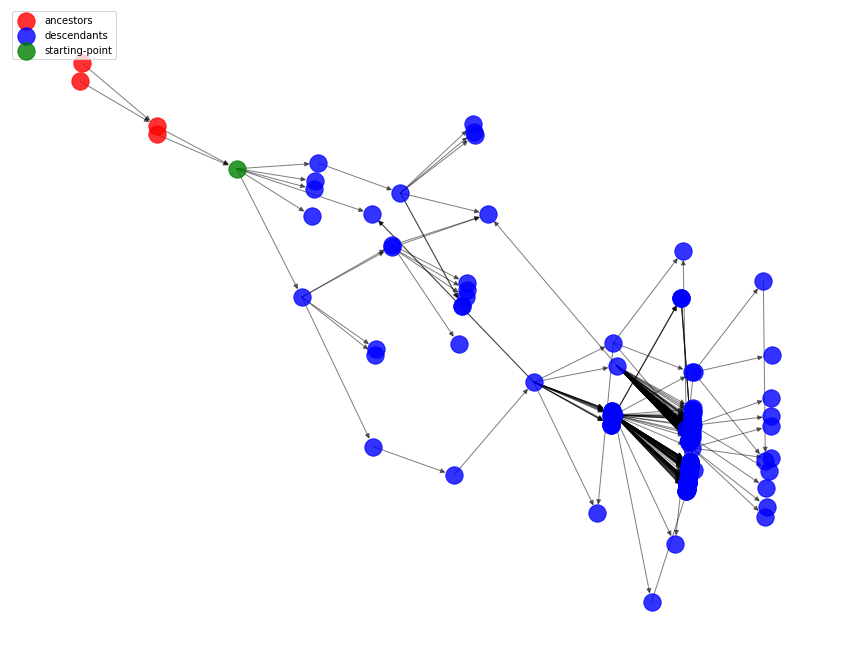

Saving as: ancestor_descendants_nodeType_-2124841084056693504.png


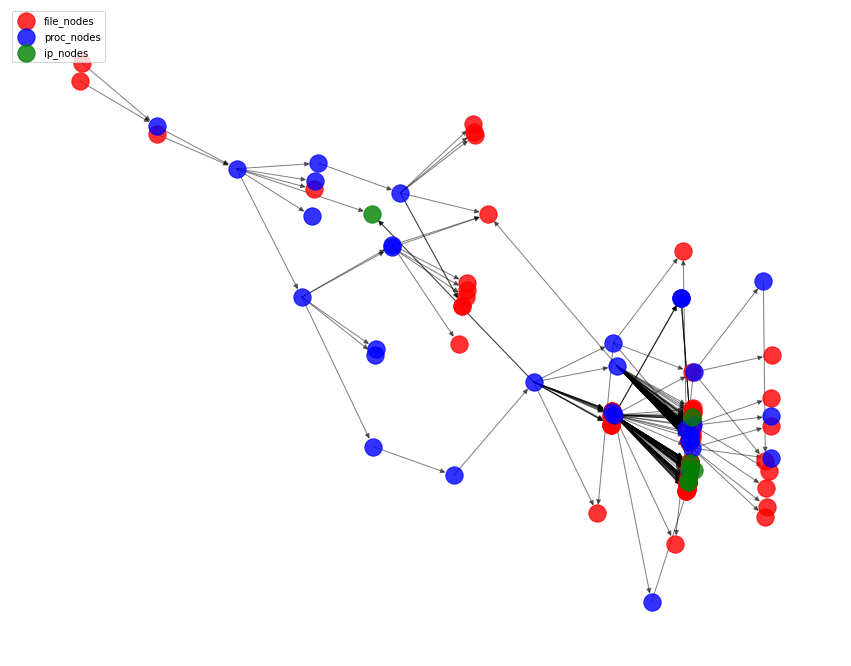

35


/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,ProcessGuid,Hostname,orig_label,graph_label,CommandLine
8974,{47ab858c-e342-5eac-d703-000000000400},SCRANTON.dmevals.local,True,True,"""C:\Program Files\SysinternalsSuite\accesschk.exe"""
14768,{47ab858c-e23d-5eac-c603-000000000400},SCRANTON.dmevals.local,True,True,powershell.exe
39393,{47ab858c-e2f2-5eac-d203-000000000400},SCRANTON.dmevals.local,True,True,"""C:\Program Files\SysinternalsSuite\sdelete64.exe"" /accepteula C:\Users\pbeesly\AppData\Roaming\Draft.Zip"
60037,{47ab858c-e1f8-5eac-bc03-000000000400},SCRANTON.dmevals.local,True,True,powershell
68686,{47ab858c-e2ac-5eac-cb03-000000000400},SCRANTON.dmevals.local,True,True,"""C:\Program Files\SysinternalsSuite\sdelete64.exe"" /accepteula C:\programdata\victim\???cod.3aka3.scr"
72642,{47ab858c-e18b-5eac-b103-000000000400},SCRANTON.dmevals.local,True,True,powershell
96356,{47ab858c-e1e4-5eac-b803-000000000400},SCRANTON.dmevals.local,True,True,"""PowerShell.exe"" -noni -noexit -ep bypass -window hidden -c ""sal a New-Object;Add-Type -AssemblyName 'System.Drawing'; $g=a System.Drawing.Bitmap('C:\Users\pbeesly\Downloads\monkey.png');$o=a Byte[] 4480;for($i=0; $i -le 6; $i++){foreach($x in(0..639)){$p=$g.GetPixel($x,$i);$o[$i*640+$x]=([math]::Floor(($p.B-band15)*16)-bor($p.G-band15))}};$g.Dispose();IEX([System.Text.Encoding]::ASCII.GetString($o[0..3932]))"""
113037,{47ab858c-e188-5eac-b003-000000000400},SCRANTON.dmevals.local,True,True,"""C:\windows\system32\cmd.exe"""
120642,{47ab858c-e144-5eac-ab03-000000000400},SCRANTON.dmevals.local,True,True,"""C:\windows\system32\cmd.exe"""
130522,{47ab858c-e305-5eac-d303-000000000400},SCRANTON.dmevals.local,True,True,"""C:\Program Files\SysinternalsSuite\sdelete64.exe"" /accepteula C:\Users\pbeesly\Downloads\SysinternalsSuite.zip"


In [205]:
H, malicious_root_ancestor, ancestors, descendants, file_nodes, proc_nodes, ip_nodes = manual_recurse_pipeline(G, '{47ab858c-e13c-5eac-a903-000000000400}')

### Going Undirected

In [121]:
G = G.to_undirected()
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[287, 17, 17, 6, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3]

In [122]:
graphs = list(nx.connected_component_subgraphs(G))

In [123]:
graphs

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


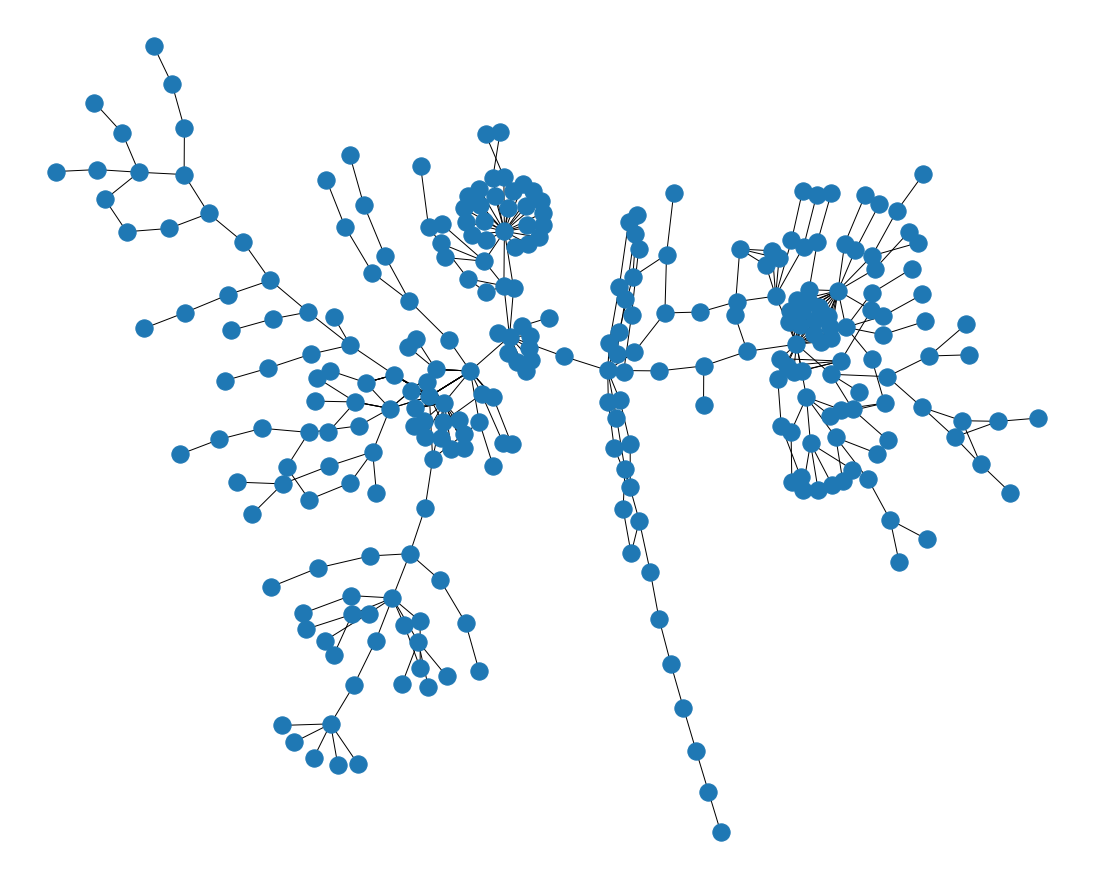

In [124]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_kamada_kawai(graphs[0], with_labels=False)

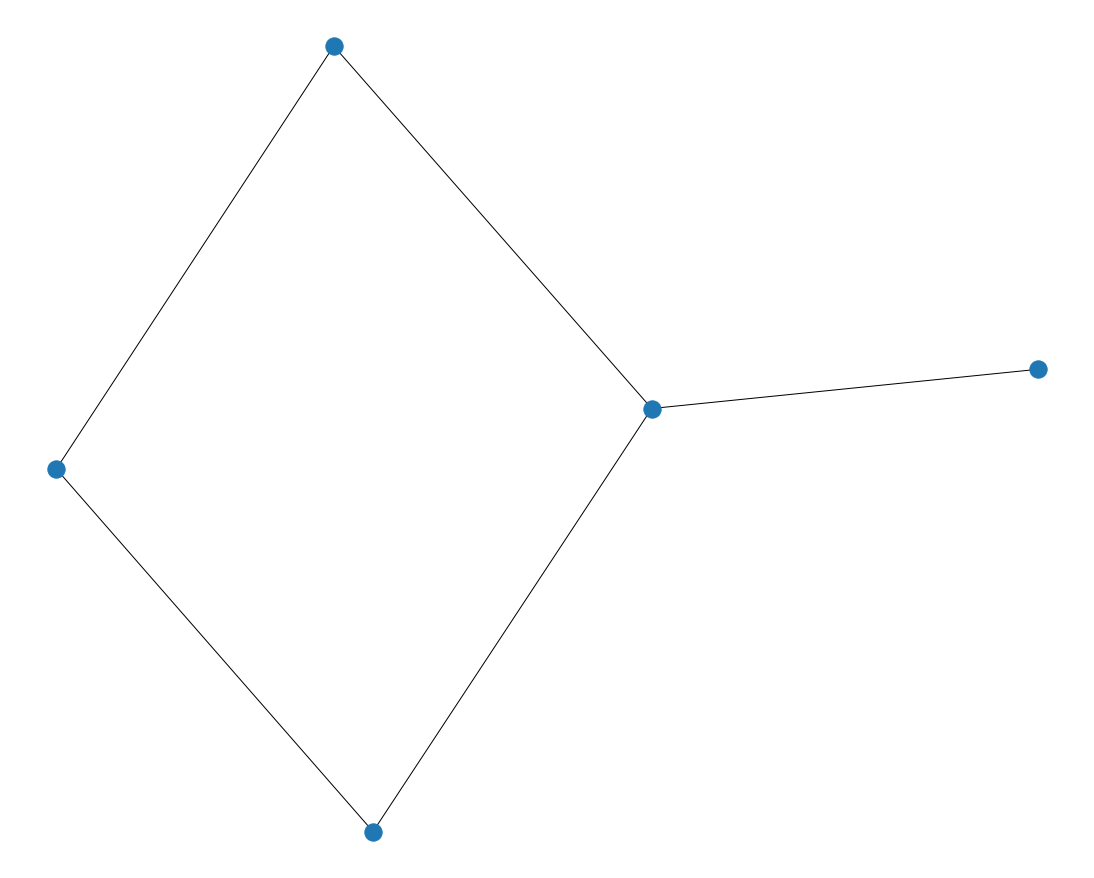

In [125]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_kamada_kawai(graphs[1], with_labels=False)

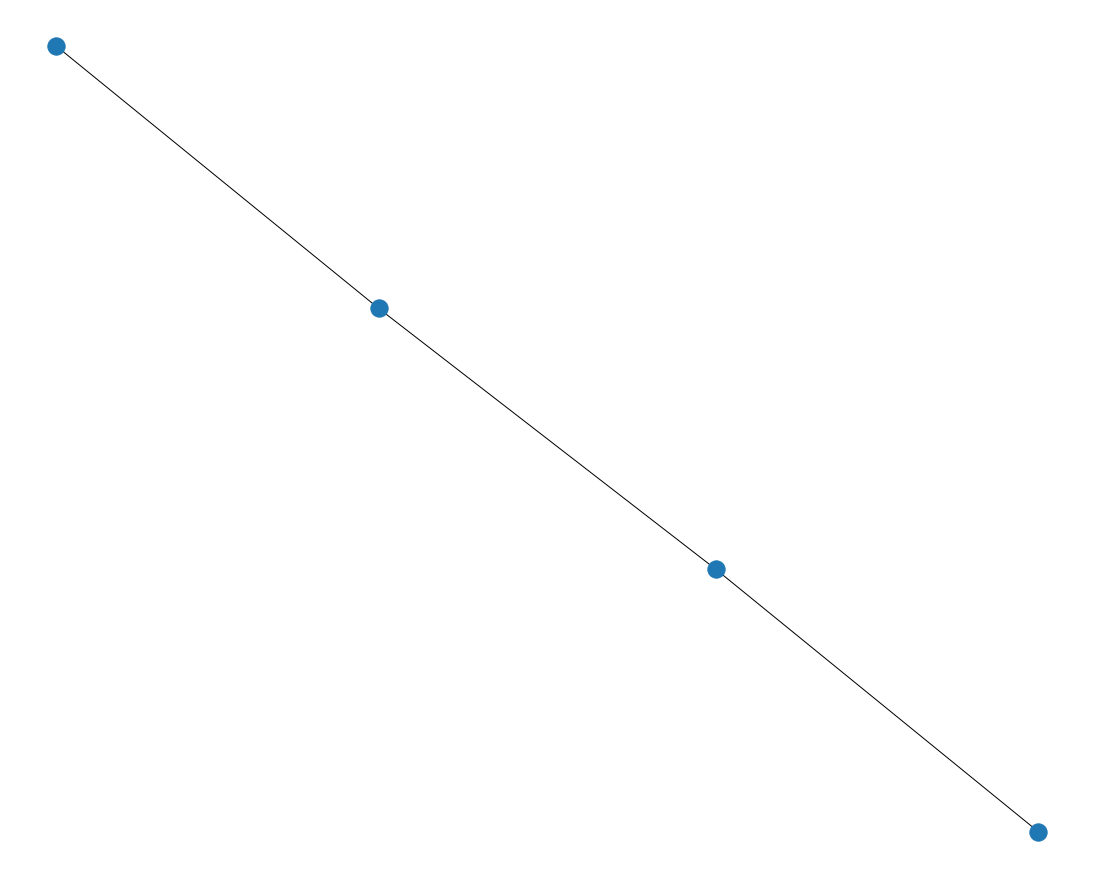

In [126]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_kamada_kawai(graphs[2], with_labels=False)

# KarateClub Formatting

In [ ]:
#The graph is undirected.
G = G.to_undirected()

In [122]:
# Convert the object to JSON
#graph_json = NetworkX.graph_to_json(G)

#with open("my_graph_small.json", "w") as f:
#    json.dump(graph_json, f)

In [123]:
list(nx.isolates(G))

[]

In [124]:
G.remove_nodes_from(list(nx.isolates(G)))

In [131]:
G = G.to_undirected()
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute='Orig_Label')

In [132]:
list(G.nodes(data=True))

[(0,
  {'data': (<SysMonProc> process_guid={47ab858c-cadc-5eac-2200-000000000400}),
   'Orig_Label': 7605756678949184438}),
 (1,
  {'data': (<SysMonProc> process_guid={47ab858c-e589-5eac-f803-000000000400}),
   'Orig_Label': -6941030430542843715}),
 (2,
  {'data': (<SysMonProc> process_guid={47ab858c-e296-5eac-c803-000000000400}),
   'Orig_Label': 22487237678128871}),
 (3,
  {'data': (<SysMonProc> process_guid={47ab858c-e2d4-5eac-cd03-000000000400}),
   'Orig_Label': -8298811802184468840}),
 (4,
  {'data': (<SysMonProc> process_guid={47ab858c-e37a-5eac-e003-000000000400}),
   'Orig_Label': 2409123009262189569}),
 (5,
  {'data': (<SysMonProc> process_guid={47ab858c-e2d4-5eac-cc03-000000000400}),
   'Orig_Label': 5663724664859128389}),
 (6,
  {'data': (<SysMonProc> process_guid={47ab858c-e68a-5eac-0304-000000000400}),
   'Orig_Label': -1912919121846679210}),
 (7,
  {'data': (<File> host=SCRANTON.dmevals.local full_path=C:\Windows\System32\svchost.exe),
   'Orig_Label': -46763653583354037

In [128]:
list(G.edges.data())

[(7605756678949184438,
  -6941030430542843715,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:14:17.672'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  22487237678128871,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:01:42.046'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  -8298811802184468840,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:02:44.901'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  2409123009262189569,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:05:30.108'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  5663724664859128389,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:02:44.870'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  -1912919121846679210,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:18:34.907'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  -4676365358335403721,
  {'key': 'File Of', 'data': None, 'edge_name'

In [130]:
nx.is_connected(G)

False

In [129]:
from karateclub import LabelPropagation

model = LabelPropagation()
model.fit(G)
cluster_membership = model.get_memberships()

ValueError: Graph is not connected. Please see requirements.